In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 加载数据
with open("dirty.json", "r") as file:
    data = json.load(file)

# 准备数据
def prepare_data(N, P):
    features = []
    labels = []
    for key, v in data.items():
        dirtyList = v['isDirtyList']
        print(len(dirtyList))
        for i in range(len(dirtyList) - N - 1):
            window = dirtyList[i:i+N]
            percentage_dirty = (sum(window) / N) * 100
            features.append([percentage_dirty])  # 特征为窗口内的脏页百分比
            labels.append(1 if dirtyList[i+N] >= P else 0)  # 标签基于百分比阈值
        break
    return np.array(features), np.array(labels)
prepare_data(2,10)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

Best N=2, Best P=50 with Accuracy=0.9518


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

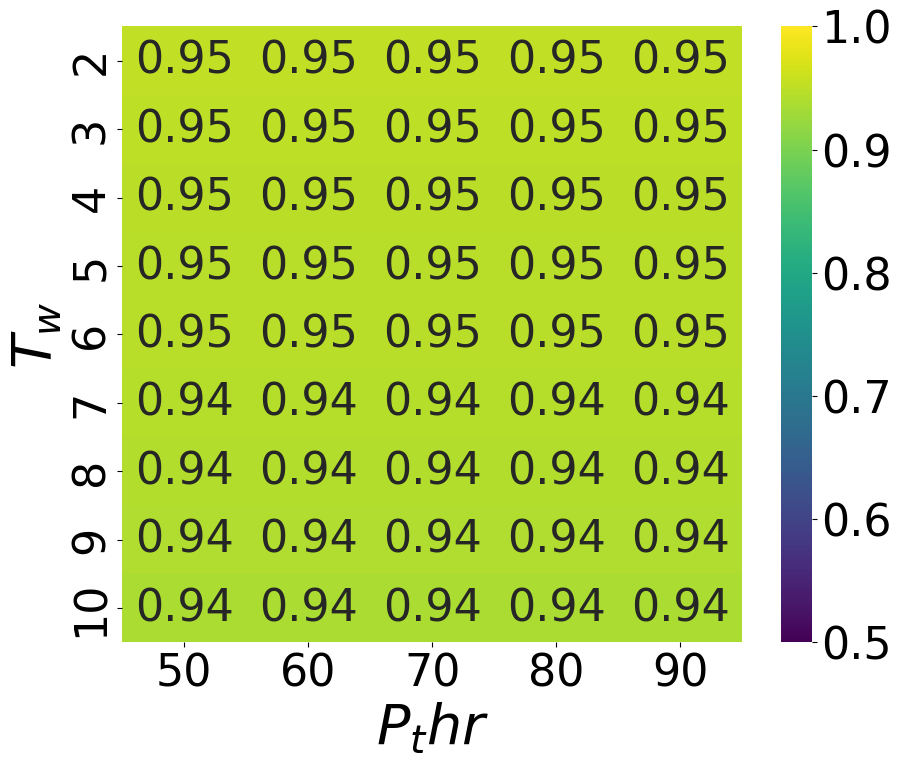

In [11]:
import json
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import font_manager
# 列出系统中的所有字体文件路径
font_files = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 输出字体文件列表，查找包含 'Times New Roman' 的路径
for font in font_files:
    if 'Times New Roman' in font:
        font_path = font
        font_prop = font_manager.FontProperties(fname=font_path)
        plt.rcParams['font.family'] = font_prop.get_name()
# matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

label_size = 40
tick_size = 32
linewidth = 2.5
legend_size = 28
mark_size = 10
bwith = 2
# 加载数据
with open("../../Motivation/bt-B-dirty.json", "r") as file:
    data = json.load(file)

def prepare_data(N, P):
    features = []
    labels = []
    predictions = []
    for key, v in data.items():
        dirtyList = v['isDirtyList']
        # 确保有足够的数据点进行预测
        if len(dirtyList) > N:
            for i in range(len(dirtyList) - N):
                window = dirtyList[i:i+N]
                percentage_dirty = (sum(window) / N) * 100
                actual_label = dirtyList[i+N] 
                predicted_label = 1 if percentage_dirty > P else 0  
                features.append([percentage_dirty])  
                labels.append(actual_label)
                predictions.append(predicted_label)
    return np.array(features), np.array(labels), np.array(predictions)


N_values = [2,3,4,5,6,7,8,9,10]
P_values = [50, 60, 70, 80, 90]

accuracy_matrix = np.zeros((len(N_values), len(P_values)))


for i, N in enumerate(N_values):
    for j, P in enumerate(P_values):
        _, labels, predictions = prepare_data(N, P)
        accuracy = accuracy_score(labels, predictions)
        accuracy_matrix[i, j] = accuracy
        #print(f"Accuracy for N={N}, P={P}: {accuracy:.4f}")


max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
best_N = N_values[max_idx[0]]
best_P = P_values[max_idx[1]]
best_accuracy = accuracy_matrix[max_idx]
print(f"Best N={best_N}, Best P={best_P} with Accuracy={best_accuracy:.4f}")


plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", xticklabels=P_values, yticklabels=N_values, cmap='viridis', vmin=0.5, vmax=1.0)
plt.xlabel('$P_thr$',fontsize=label_size)
plt.ylabel('$T_{w}$',fontsize=label_size)
import os
plt.savefig(os.path.join(".","en_Memcached_PT.pdf") ,format='pdf',bbox_inches='tight')
plt.savefig(os.path.join(".","en_Memcached_PT.png") ,format='png',bbox_inches='tight')
plt.show()


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

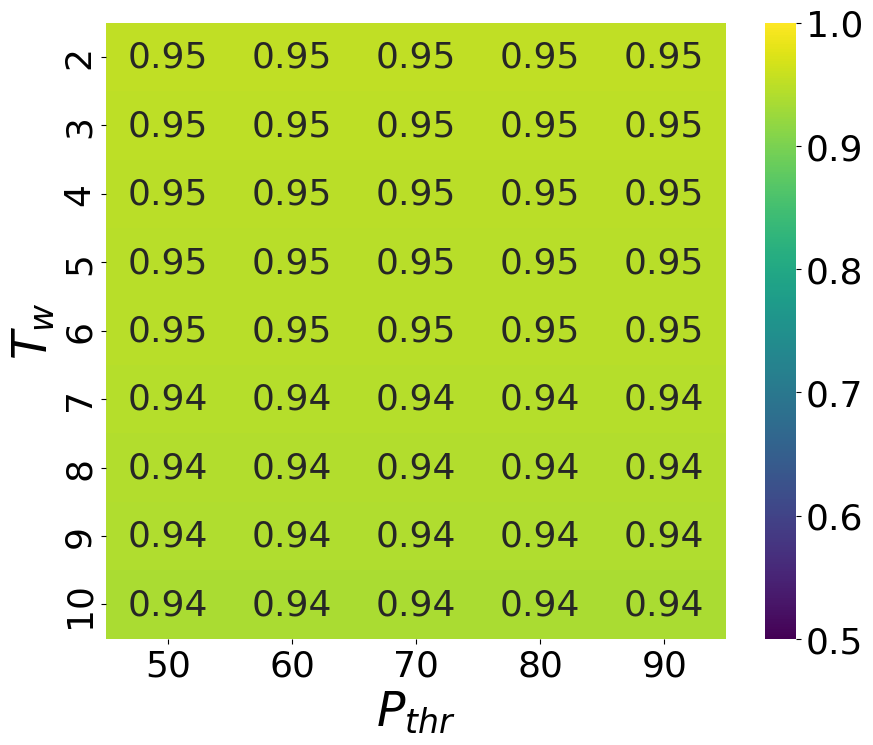

In [8]:
matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 26
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# 绘制热图
label_size = 34
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", xticklabels=P_values, yticklabels=N_values, cmap='viridis', vmin=0.5, vmax=1.0)
plt.xlabel('$P_{thr}$',fontsize=label_size)
plt.ylabel('$T_{w}$',fontsize=label_size)
import os
plt.savefig(os.path.join(".","en_Memcached_PT.pdf") ,format='pdf',bbox_inches='tight')
plt.savefig(os.path.join(".","en_Memcached_PT.png") ,format='png',bbox_inches='tight')
plt.show()

Best N=2, Best P=50 with Accuracy=1.0000


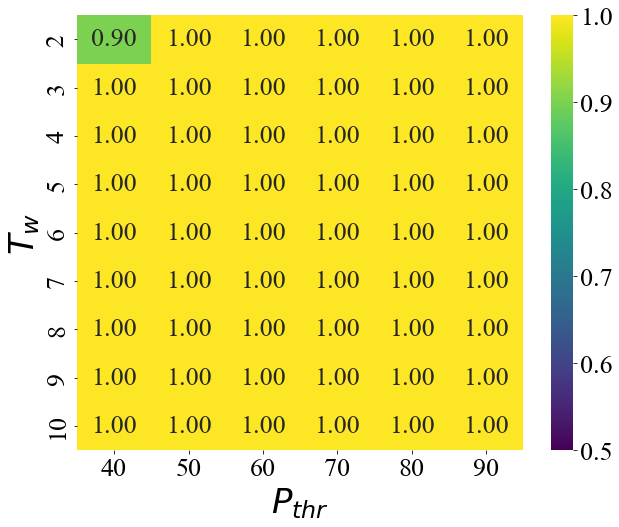

In [9]:
import json
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

with open("cg-B-dirty.json", "r") as file:
    data = json.load(file)

def prepare_data(N, P):
    features = []
    labels = []
    predictions = []
    for key, v in data.items():
        dirtyList = v['isDirtyList']
       
        if len(dirtyList) > N:
            for i in range(len(dirtyList) - N):
                window = dirtyList[i:i+N]
                percentage_dirty = (sum(window) / N) * 100
                actual_label = dirtyList[i+N]  
                predicted_label = 1 if percentage_dirty > P else 0  
                features.append([percentage_dirty]) 
                labels.append(actual_label)
                predictions.append(predicted_label)
    return np.array(features), np.array(labels), np.array(predictions)


N_values = [2,3,4,5,6,7,8,9,10]
P_values = [40, 50, 60, 70, 80, 90]


accuracy_matrix = np.zeros((len(N_values), len(P_values)))


for i, N in enumerate(N_values):
    for j, P in enumerate(P_values):
        _, labels, predictions = prepare_data(N, P)
        accuracy = accuracy_score(labels, predictions)
        accuracy_matrix[i, j] = accuracy
        #print(f"Accuracy for N={N}, P={P}: {accuracy:.4f}")

max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
best_N = N_values[max_idx[0]]
best_P = P_values[max_idx[1]]
best_accuracy = accuracy_matrix[max_idx]
print(f"Best N={best_N}, Best P={best_P} with Accuracy={best_accuracy:.4f}")

label_size = 34
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", xticklabels=P_values, yticklabels=N_values, cmap='viridis', vmin=0.5, vmax=1.0)
plt.xlabel('$P_{thr}$',fontsize=label_size)
plt.ylabel('$T_{w}$',fontsize=label_size)
import os
plt.savefig(os.path.join(".","en_cg_PT.pdf") ,format='pdf',bbox_inches='tight')
plt.savefig(os.path.join(".","en_cg_PT.png") ,format='png',bbox_inches='tight')
plt.show()


Best N=2, Best P=50 with Accuracy=0.9518


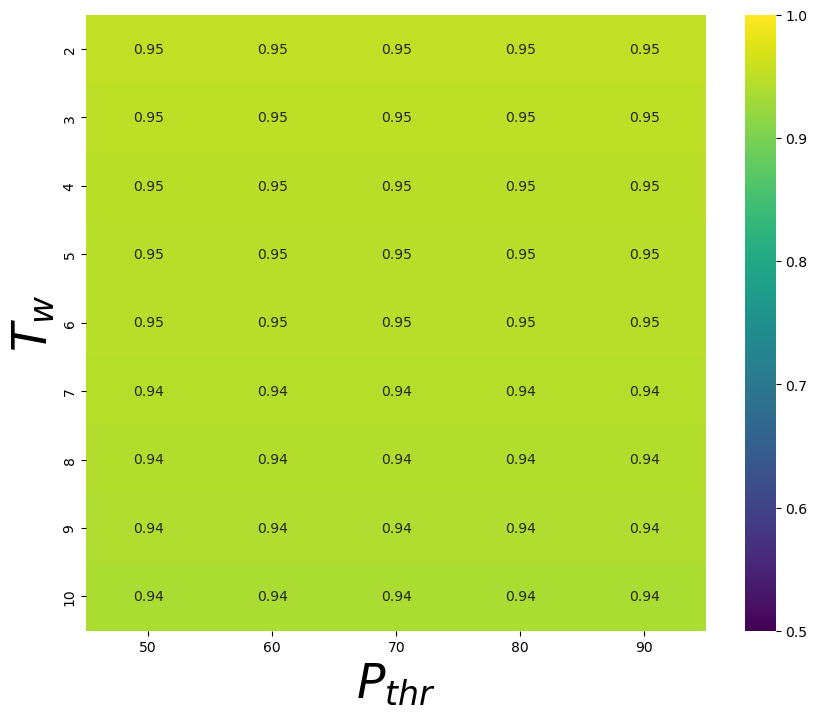

In [3]:
import json
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

with open("../../Motivation/bt-B-dirty.json", "r") as file:
    data = json.load(file)

def prepare_data(N, P):
    features = []
    labels = []
    predictions = []
    for key, v in data.items():
        dirtyList = v['isDirtyList']
        
        if len(dirtyList) > N:
            for i in range(len(dirtyList) - N):
                window = dirtyList[i:i+N]
                percentage_dirty = (sum(window) / N) * 100
                actual_label = dirtyList[i+N] 
                predicted_label = 1 if percentage_dirty > P else 0 
                features.append([percentage_dirty])  
                labels.append(actual_label)
                predictions.append(predicted_label)
    return np.array(features), np.array(labels), np.array(predictions)


N_values = [2,3,4,5,6,7,8,9,10]
# P_values = [40, 50, 60, 70, 80, 90]
P_values = [50, 60, 70, 80, 90]

accuracy_matrix = np.zeros((len(N_values), len(P_values)))

for i, N in enumerate(N_values):
    for j, P in enumerate(P_values):
        _, labels, predictions = prepare_data(N, P)
        accuracy = accuracy_score(labels, predictions)
        accuracy_matrix[i, j] = accuracy
        #print(f"Accuracy for N={N}, P={P}: {accuracy:.4f}")


max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
best_N = N_values[max_idx[0]]
best_P = P_values[max_idx[1]]
best_accuracy = accuracy_matrix[max_idx]
print(f"Best N={best_N}, Best P={best_P} with Accuracy={best_accuracy:.4f}")

label_size = 34
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", xticklabels=P_values, yticklabels=N_values, cmap='viridis', vmin=0.5, vmax=1.0)
plt.xlabel('$P_{thr}$',fontsize=label_size)
plt.ylabel('$T_{w}$',fontsize=label_size)
import os
plt.savefig(os.path.join(".","en_bt_PT.pdf") ,format='pdf',bbox_inches='tight')
plt.savefig(os.path.join(".","en_bt_PT.png") ,format='png',bbox_inches='tight')
plt.show()
